In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

from statsmodels.tsa.stattools import adfuller
!pip install pmdarima --quiet
import pmdarima as pm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 35.4 MB/s eta 0:00:00


In [2]:
from google.colab import files

# Prompt the user to select a file
uploaded = files.upload()

Saving time_series_ass3.csv to time_series_ass3.csv


In [3]:
df = pd.read_csv("time_series_ass3.csv")

In [4]:
print(df.columns)

Index(['Unnamed: 0', 'From', 'To (Interval: 15M)', 'PM10 (µg/m3)',
       'PM2.5 (µg/m3)', 'NO (µg/m3)'],
      dtype='object')


In [5]:
df

,Unnamed: 0,From,To (Interval: 15M),PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3)
0,0,2023-02-01 00:00:00,2023-02-01 00:15:00,95.0,35.0,NaN
1,1,2023-02-01 00:15:00,2023-02-01 00:30:00,95.0,35.0,NaN
2,2,2023-02-01 00:30:00,2023-02-01 00:45:00,95.0,35.0,NaN
3,3,2023-02-01 00:45:00,2023-02-01 01:00:00,122.0,34.0,NaN
4,4,2023-02-01 01:00:00,2023-02-01 01:15:00,122.0,34.0,NaN
...,...,...,...,...,...,...
8635,8635,2023-05-01 22:45:00,2023-05-01 23:00:00,19.0,11.0,17.9
8636,8636,2023-05-01 23:00:00,2023-05-01 23:15:00,19.0,11.0,17.9
8637,8637,2023-05-01 23:15:00,2023-05-01 23:30:00,19.0,11.0,19.6
8638,8638,2023-05-01 23:30:00,2023-05-01 23:45:00,19.0,11.0,20.8


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          8640 non-null   int64  
 1   From                8640 non-null   object 
 2   To (Interval: 15M)  8640 non-null   object 
 3   PM10 (µg/m3)        6959 non-null   float64
 4   PM2.5 (µg/m3)       8414 non-null   float64
 5   NO (µg/m3)          7271 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 405.1+ KB


In [8]:
df.head()

,Unnamed: 0,From,To (Interval: 15M),PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3)
0,0,2023-02-01 00:00:00,2023-02-01 00:15:00,95.0,35.0,NaN
1,1,2023-02-01 00:15:00,2023-02-01 00:30:00,95.0,35.0,NaN
2,2,2023-02-01 00:30:00,2023-02-01 00:45:00,95.0,35.0,NaN
3,3,2023-02-01 00:45:00,2023-02-01 01:00:00,122.0,34.0,NaN
4,4,2023-02-01 01:00:00,2023-02-01 01:15:00,122.0,34.0,NaN


In [9]:
df.nunique()

Unnamed: 0            8640
From                  8640
To (Interval: 15M)    8640
PM10 (µg/m3)           375
PM2.5 (µg/m3)          244
NO (µg/m3)             774
dtype: int64

In [10]:
df.shape

(8640, 6)

In [11]:
df.isnull().sum()

Unnamed: 0               0
From                     0
To (Interval: 15M)       0
PM10 (µg/m3)          1681
PM2.5 (µg/m3)          226
NO (µg/m3)            1369
dtype: int64

### Pre-Prossessing of Data

In [12]:
df.columns = df.columns.str.strip()
df['From'] = pd.to_datetime(df['From'])
df['To (Interval: 15M)'] = pd.to_datetime(df['To (Interval: 15M)'])
df = df.set_index('From')
df.head()

,Unnamed: 0,To (Interval: 15M),PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3)
From,,,,,
2023-02-01 00:00:00,0,2023-02-01 00:15:00,95.0,35.0,NaN
2023-02-01 00:15:00,1,2023-02-01 00:30:00,95.0,35.0,NaN
2023-02-01 00:30:00,2,2023-02-01 00:45:00,95.0,35.0,NaN
2023-02-01 00:45:00,3,2023-02-01 01:00:00,122.0,34.0,NaN
2023-02-01 01:00:00,4,2023-02-01 01:15:00,122.0,34.0,NaN


In [13]:
df_resampled = df.resample('15T').mean()
display(df_resampled.head())

<ipython-input-13-4af691015114>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample('15T').mean()


,Unnamed: 0,PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3)
From,,,,
2023-02-01 00:00:00,0.0,95.0,35.0,NaN
2023-02-01 00:15:00,1.0,95.0,35.0,NaN
2023-02-01 00:30:00,2.0,95.0,35.0,NaN
2023-02-01 00:45:00,3.0,122.0,34.0,NaN
2023-02-01 01:00:00,4.0,122.0,34.0,NaN


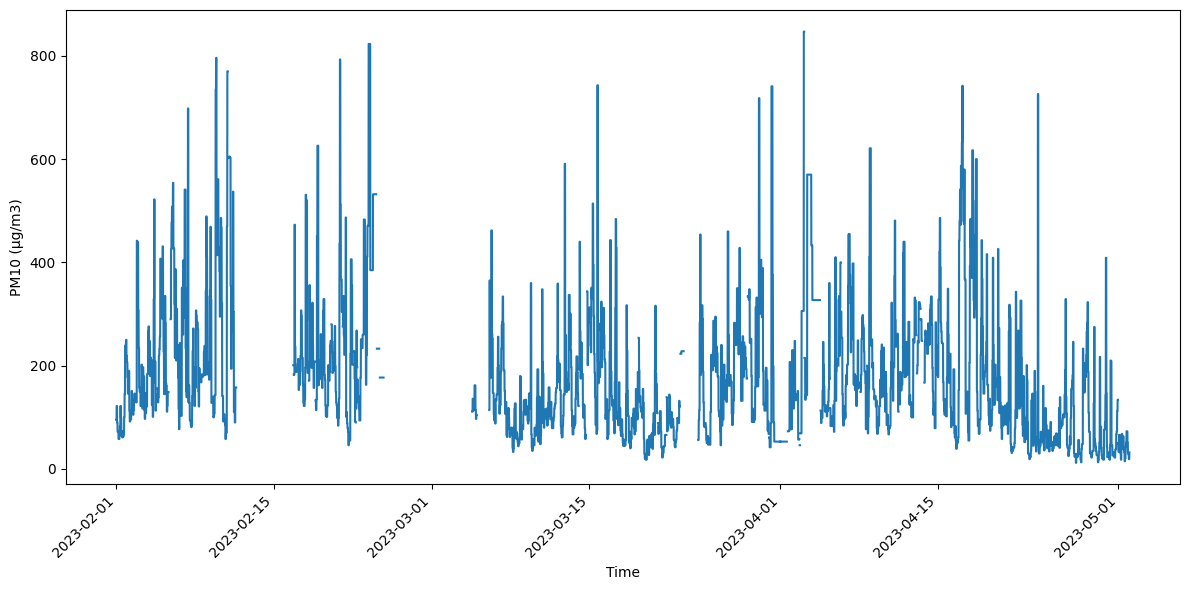

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(df_resampled.index, df_resampled['PM10 (µg/m3)'])
plt.xlabel('Time')
plt.ylabel('PM10 (µg/m3)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

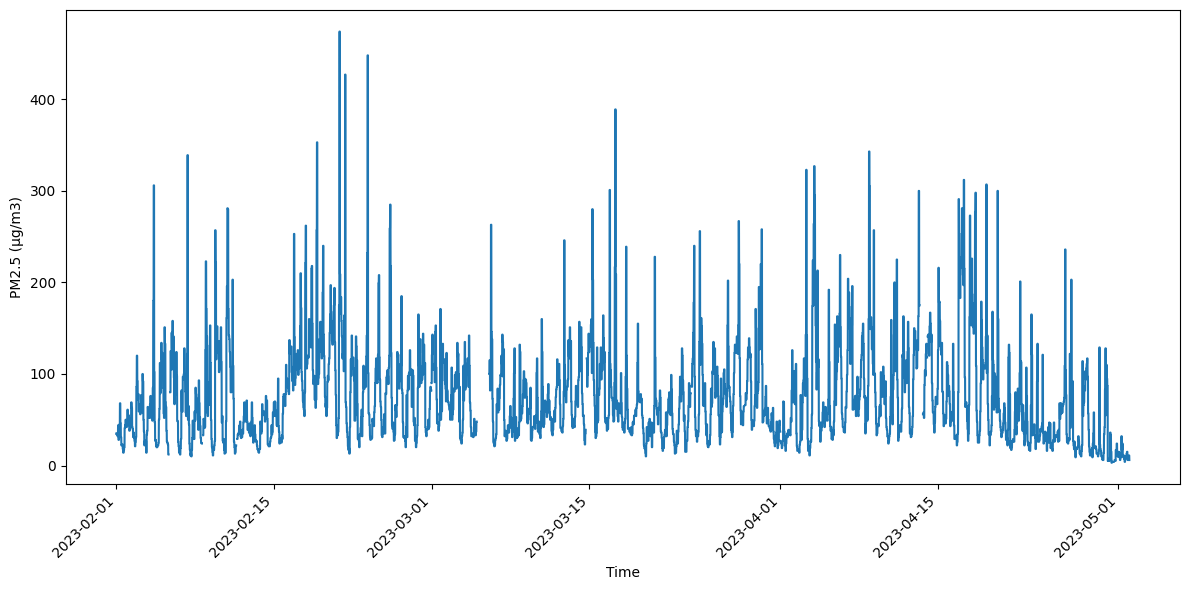

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(df_resampled.index, df_resampled['PM2.5 (µg/m3)'])
plt.xlabel('Time')
plt.ylabel('PM2.5 (µg/m3)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

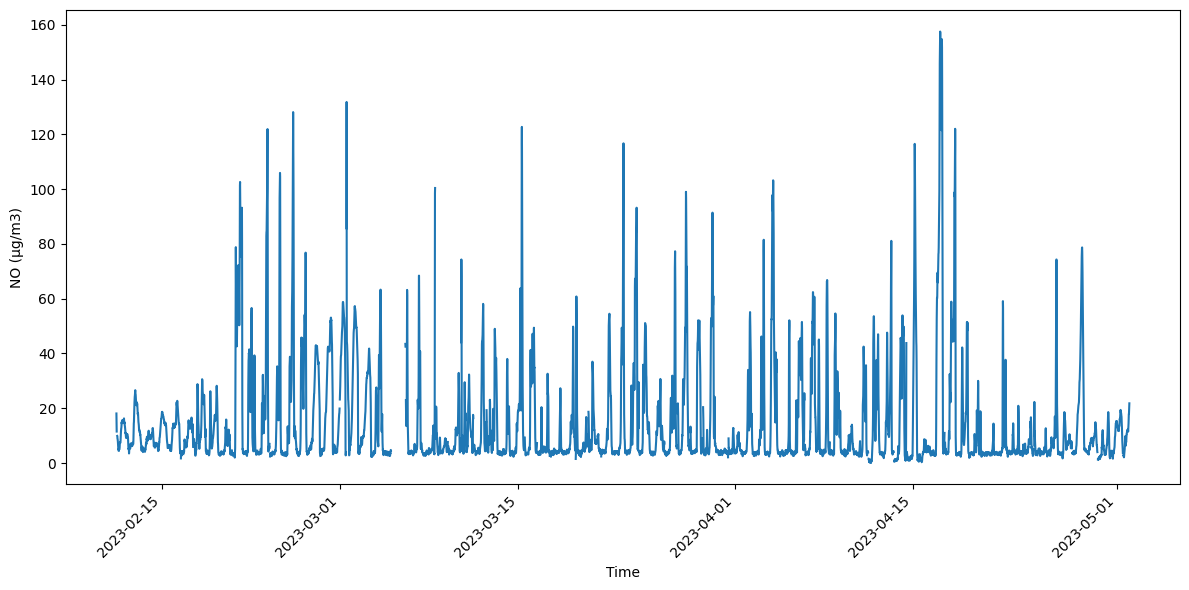

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df_resampled.index, df_resampled['NO (µg/m3)'])
plt.xlabel('Time')
plt.ylabel('NO (µg/m3)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

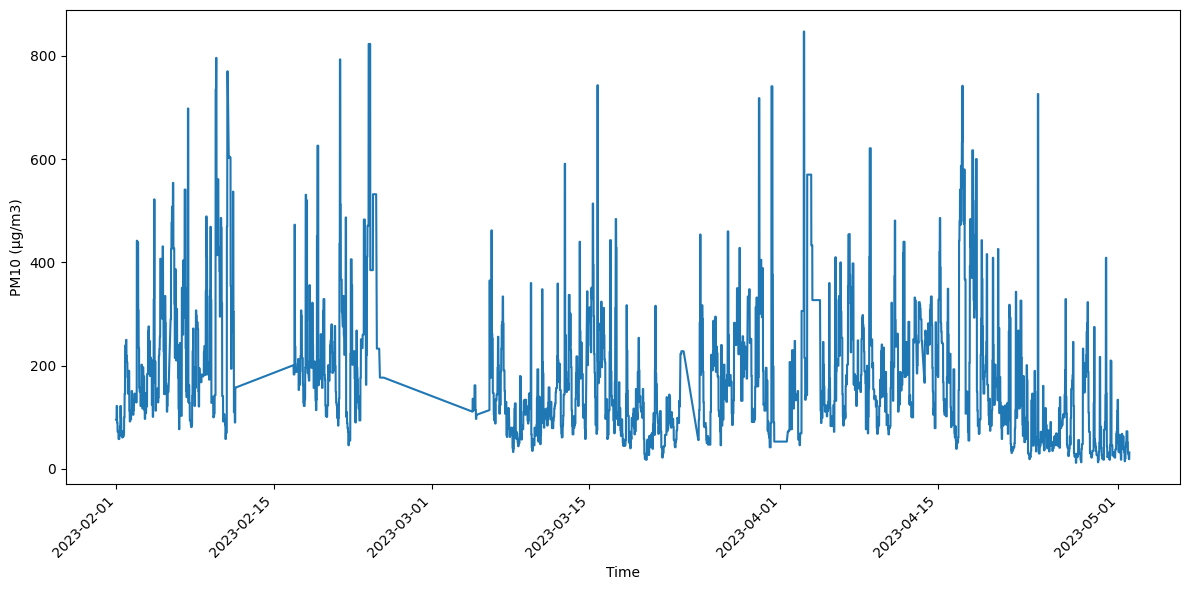

In [17]:
df_filled = df_resampled.interpolate()

plt.figure(figsize=(12, 6))
plt.plot(df_filled.index, df_filled['PM10 (µg/m3)'])
plt.xlabel('Time')
plt.ylabel('PM10 (µg/m3)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

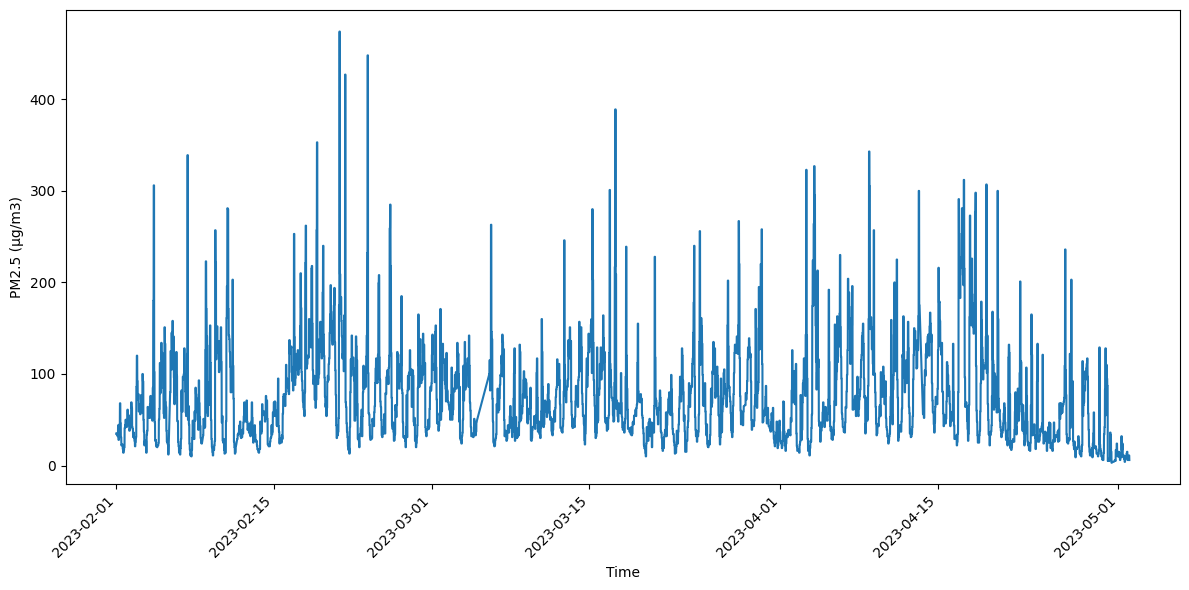

In [18]:
df_filled = df_resampled.interpolate()

plt.figure(figsize=(12, 6))
plt.plot(df_filled.index, df_filled['PM2.5 (µg/m3)'])
plt.xlabel('Time')
plt.ylabel('PM2.5 (µg/m3)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

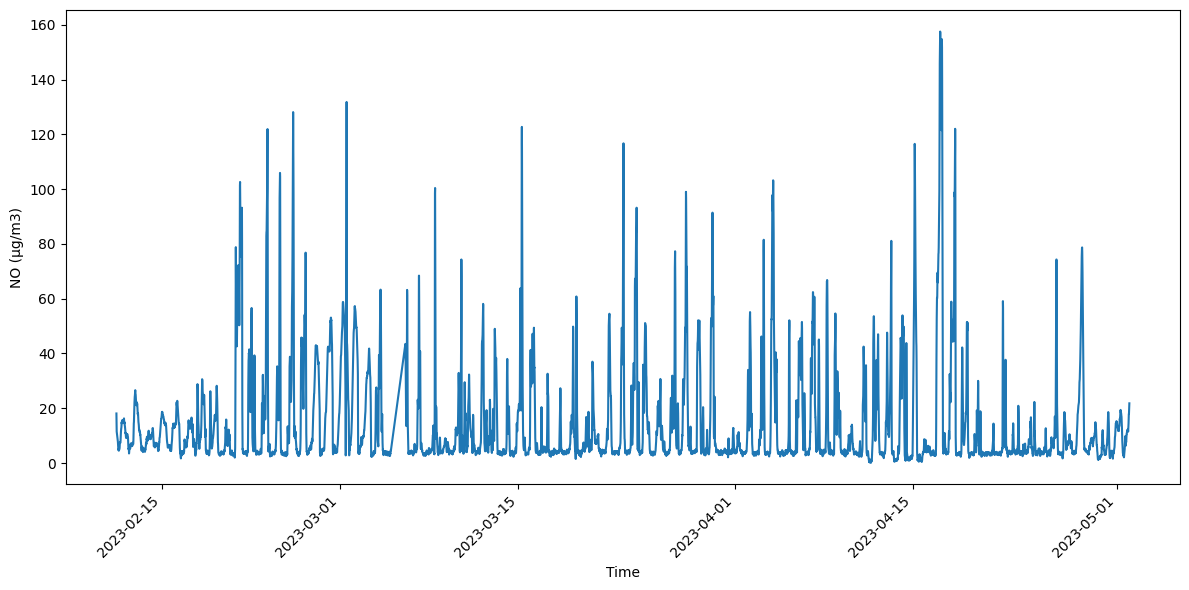

In [19]:
df_filled = df_resampled.interpolate()

plt.figure(figsize=(12, 6))
plt.plot(df_filled.index, df_filled['NO (µg/m3)'])
plt.xlabel('Time')
plt.ylabel('NO (µg/m3)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [20]:
df_filled.isnull().sum()

Unnamed: 0          0
PM10 (µg/m3)        0
PM2.5 (µg/m3)       0
NO (µg/m3)       1004
dtype: int64

In [21]:
df.describe()

,Unnamed: 0,PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3)
count,8640.000000,6959.000000,8414.000000,7271.000000
mean,4319.500000,181.408679,75.690397,14.649636
std,2494.297496,136.016142,55.245265,19.221385
min,0.000000,12.000000,3.000000,0.100000
25%,2159.750000,84.000000,36.000000,3.900000
50%,4319.500000,145.000000,61.000000,6.100000
75%,6479.250000,238.000000,101.000000,16.500000
max,8639.000000,847.000000,474.000000,157.500000


In [22]:
df_filled.describe()

,Unnamed: 0,PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3)
count,8640.000000,8640.000000,8640.000000,7636.000000
mean,4319.500000,177.463079,75.557350,14.524751
std,2494.297496,124.773568,54.826850,18.961752
min,0.000000,12.000000,3.000000,0.100000
25%,2159.750000,97.000000,36.821429,3.900000
50%,4319.500000,151.900794,61.000000,6.100000
75%,6479.250000,215.000000,101.000000,16.600000
max,8639.000000,847.000000,474.000000,157.500000


## PM10

In [110]:
import pandas as pd

dfs = [df_filled_1, df_filled_2, df_filled_3]
combined_dfs = []

for df in dfs:
    Q1 = df['PM10 (µg/m3)'].quantile(0.25)
    Q3 = df['PM10 (µg/m3)'].quantile(0.80)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    filtered_df = df[(df['PM10 (µg/m3)'] > lower_limit) & (df['PM10 (µg/m3)'] < upper_limit)]
    combined_dfs.append(filtered_df)

combined_df = pd.concat(combined_dfs, ignore_index=True)


In [119]:
combined_df

,Unnamed: 0,PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3)
0,0.0,95.0,35.0,NaN
1,1.0,95.0,35.0,NaN
2,2.0,95.0,35.0,NaN
3,3.0,122.0,34.0,NaN
4,4.0,122.0,34.0,NaN
...,...,...,...,...
23048,8635.0,19.0,11.0,17.9
23049,8636.0,19.0,11.0,17.9
23050,8637.0,19.0,11.0,19.6
23051,8638.0,19.0,11.0,20.8


## Fitting ARIMA Model

In [90]:
import seaborn as sns

<Axes: ylabel='From'>

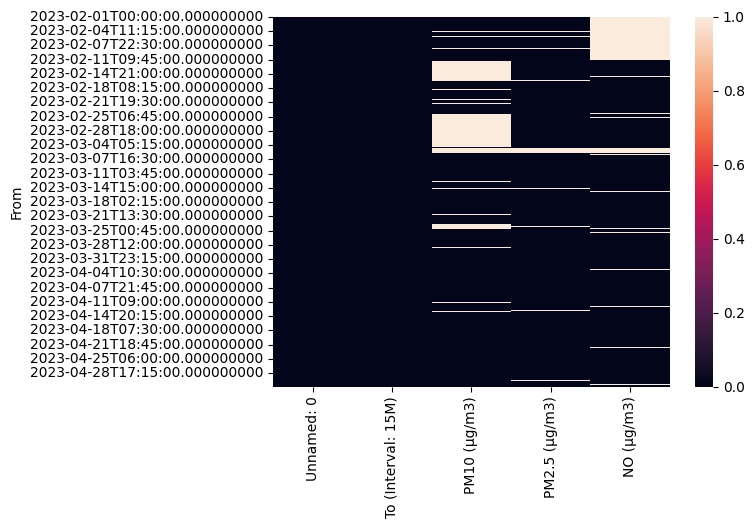

In [91]:
sns.heatmap(df.isnull())

In [112]:
def predict_missing_values(data, forecast_length):
    ob = data.dropna()
    mi = data[data.isna()]
    model = ARIMA(ob, order=(1, 1, 1))
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(ob), end=len(ob) + forecast_length - 1)
    data_missing_filled = data.copy()
    data_missing_filled[data_missing_filled.isna()] = predictions
    return data_missing_filled

In [113]:
from statsmodels.tsa.arima.model import ARIMA

In [114]:
f = 10
pm10 = predict_missing_values(combined_df['PM10 (µg/m3)'], f)
pm25= predict_missing_values(combined_df['PM2.5 (µg/m3)'], f)
no = predict_missing_values(combined_df['NO (µg/m3)'], f)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was

In [116]:
def next_10(data):
    ar=ARIMA(data,order=(0,1,0))
    ar_fit=ar.fit()
    forecast=ar_fit.forecast(steps=960)
    return forecast
pm10=next_10(combined_df['PM10 (µg/m3)'])
pm25=next_10(combined_df['PM2.5 (µg/m3)'])
no=next_10(combined_df['NO (µg/m3)'])

In [117]:
from datetime import datetime
import pandas as pd

last_date = datetime(2023, 5, 2, 0, 0, 0)
dates = pd.date_range(start=last_date + pd.Timedelta(minutes=15), periods=960, freq='15Min')
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

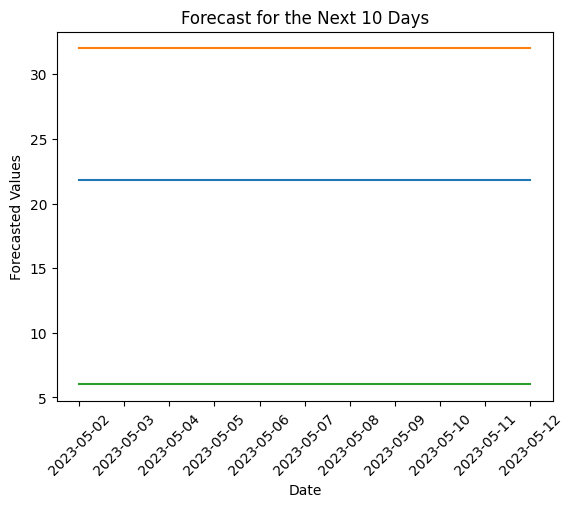

In [118]:
plt.plot(dates,no)
plt.plot(dates,pm10)
plt.plot(dates,pm25)
plt.xlabel('Date')
plt.ylabel('Forecasted Values')
plt.title('Forecast for the Next 10 Days')
plt.xticks(rotation=45)
plt.show()

In [99]:
resampled_df = df_filled_3.resample('15T').mean()

resampled_df = resampled_df.fillna(np.nan)

display(resampled_df.head())
display(resampled_df.tail())

,Unnamed: 0,PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3)
From,,,,
2023-02-11 11:00:00,1004.0,110.0,26.0,18.1
2023-02-11 11:15:00,1005.0,110.0,26.0,14.4
2023-02-11 11:30:00,1006.0,110.0,26.0,11.5
2023-02-11 11:45:00,1007.0,110.0,20.0,11.1
2023-02-11 12:00:00,1008.0,110.0,20.0,10.7


,Unnamed: 0,PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3)
From,,,,
2023-05-01 22:45:00,8635.0,19.0,11.0,17.9
2023-05-01 23:00:00,8636.0,19.0,11.0,17.9
2023-05-01 23:15:00,8637.0,19.0,11.0,19.6
2023-05-01 23:30:00,8638.0,19.0,11.0,20.8
2023-05-01 23:45:00,8639.0,32.0,6.0,21.8
